In [1]:
import pandas as pd
import numpy as np

In [2]:
#Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
#NLP
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\KAREN J
[nltk_data]     FERNANDES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('C:\\Users\\KAREN J FERNANDES\\anaconda3\\Files\\IMDb Analysis\\imdb_processed.csv')

In [5]:
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


## Data Pre-Processing

In [6]:
#view the list of columns
df.columns

Index(['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime'],
      dtype='object')

In [7]:
#dropping unnamed column
df = df.drop("Unnamed: 0",axis=1)

In [8]:
#view the list of columns
df.columns

Index(['title', 'year', 'kind', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime'],
      dtype='object')

In [9]:
#no of rows and columns
df.shape

(8451, 13)

In [10]:
#checking for no of missing values 
df.isnull().sum()

title          0
year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

In [11]:
#replacing Nan with mean value in numeric columns
df[['rating', 'vote', 'runtime']] = df[['rating', 'vote', 'runtime']].fillna(df[['rating', 'vote', 'runtime']].mean())

In [12]:
#dropping nan rows
df.dropna(inplace=True)

In [13]:
#checking for no of missing values 
df.isnull().sum()

title       0
year        0
kind        0
genre       0
rating      0
vote        0
country     0
language    0
cast        0
director    0
composer    0
writer      0
runtime     0
dtype: int64

In [14]:
#check datatypes
df.dtypes

title        object
year        float64
kind         object
genre        object
rating      float64
vote        float64
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime     float64
dtype: object

In [15]:
#converting 'year', 'runtime' and 'vote' from float to int

columns = ['year','runtime','vote']

for column in columns:
    df[column] = df[column].astype(int)

In [16]:
#check datatypes
df.dtypes

title        object
year          int32
kind         object
genre        object
rating      float64
vote          int32
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime       int32
dtype: object

In [17]:
#creating a composite key using title and release year
#add the 'Composite_Key' column
df['id'] = df['title'] + '_' + df['year'].astype(str)

#move 'Composite_Key' column to the beginning
df = df[['id'] + [col for col in df.columns if col != 'id']]

#view the list of columns
df.columns

Index(['id', 'title', 'year', 'kind', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime'],
      dtype='object')

In [18]:
#remove brackets from genre, country, language, director, cast and writer columns

columns = ['genre','country','language','cast','director','writer']

for column in columns:
    df[column] = df[column].astype(str).str.strip('[]')

In [19]:
#remove quotes from genre, country, language, director, cast, writer columns

quote_columns = ['genre','country','language','cast','director','writer']

for quote in quote_columns:
    df[quote] = df[quote].str.replace(r"\'","", regex=True)

In [20]:
df.head()

,id,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
2,8 Man_1992,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,['Carole King'],"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",99
3,What the #$*! Do We (K)now!?_2004,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente",['Christopher Franke'],"William Arntz, Betsy Chasse, Matthew Hoffman",60
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,"Comedy, Horror, Sci-Fi",4.5,2177,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,['Bob Mithoff'],"Lloyd Kaufman, Carl Morano, Matt Unger",96
7,7 Seconds_2005,7 Seconds,2005,video movie,"Action, Comedy, Crime, Thriller",4.8,7153,"United Kingdom, Romania, Switzerland, United S...",English,"Wesley Snipes, Tamzin Outhwaite, Deobia Oparei...",Simon Fellows,"['Barry Taylor', 'Neal Acree']",Martin Wheeler,118
8,By Dawn's Early Light_1990,By Dawn's Early Light,1990,tv movie,"Action, Drama, Thriller",7.1,2898,United States,"English, Russian","Powers Boothe, Rebecca De Mornay, James Earl J...",Jack Sholder,['Trevor Jones'],"William Prochnau, Bruce Gilbert",58


In [21]:
#rename column
df.rename(columns = {'kind':'category'}, inplace = True)

In [22]:
df.columns

Index(['id', 'title', 'year', 'category', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime'],
      dtype='object')

In [23]:
#dropping extra columns
column_to_drop = ['composer']
df.drop(column_to_drop, axis=1, inplace=True)
df.columns

Index(['id', 'title', 'year', 'category', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'writer', 'runtime'],
      dtype='object')

In [24]:
#check for no of duplicates present
len(df)-len(df.drop_duplicates())

5

In [25]:
#Dropping duplicates based on id column
df = df.drop_duplicates('id').sort_index()

In [26]:
#check for no of duplicates present
len(df)-len(df.drop_duplicates())

0

In [27]:
df.shape

(5199, 13)

In [28]:
df["category"].value_counts()

category
movie          4017
tv movie        578
video movie     445
episode         151
tv short          6
video game        2
Name: count, dtype: int64

In [29]:
df_new = df[~df['category'].isin(['tv short', 'video game'])]
df_new["category"].value_counts()

category
movie          4017
tv movie        578
video movie     445
episode         151
Name: count, dtype: int64

In [30]:
#replacing 'tv movies', 'video movie' to 'movie'
df_new.replace(regex=r'tv movie', value='movie', inplace=True)
df_new.replace(regex=r'video movie', value='movie', inplace=True)
df_new["category"].value_counts()

C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\4114138022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(regex=r'tv movie', value='movie', inplace=True)
C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\4114138022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(regex=r'video movie', value='movie', inplace=True)


category
movie      5040
episode     151
Name: count, dtype: int64

In [31]:
df_new.head()

,id,title,year,category,genre,rating,vote,country,language,cast,director,writer,runtime
2,8 Man_1992,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",99
3,What the #$*! Do We (K)now!?_2004,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente","William Arntz, Betsy Chasse, Matthew Hoffman",60
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,"Comedy, Horror, Sci-Fi",4.5,2177,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,"Lloyd Kaufman, Carl Morano, Matt Unger",96
7,7 Seconds_2005,7 Seconds,2005,movie,"Action, Comedy, Crime, Thriller",4.8,7153,"United Kingdom, Romania, Switzerland, United S...",English,"Wesley Snipes, Tamzin Outhwaite, Deobia Oparei...",Simon Fellows,Martin Wheeler,118
8,By Dawn's Early Light_1990,By Dawn's Early Light,1990,movie,"Action, Drama, Thriller",7.1,2898,United States,"English, Russian","Powers Boothe, Rebecca De Mornay, James Earl J...",Jack Sholder,"William Prochnau, Bruce Gilbert",58


In [32]:
df_new.to_csv('cleaned_imdb_dataset.csv')

# Exploratory Data Analysis (EDA)

## Top 10 Best Perfoming Movies

C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\2036710101.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


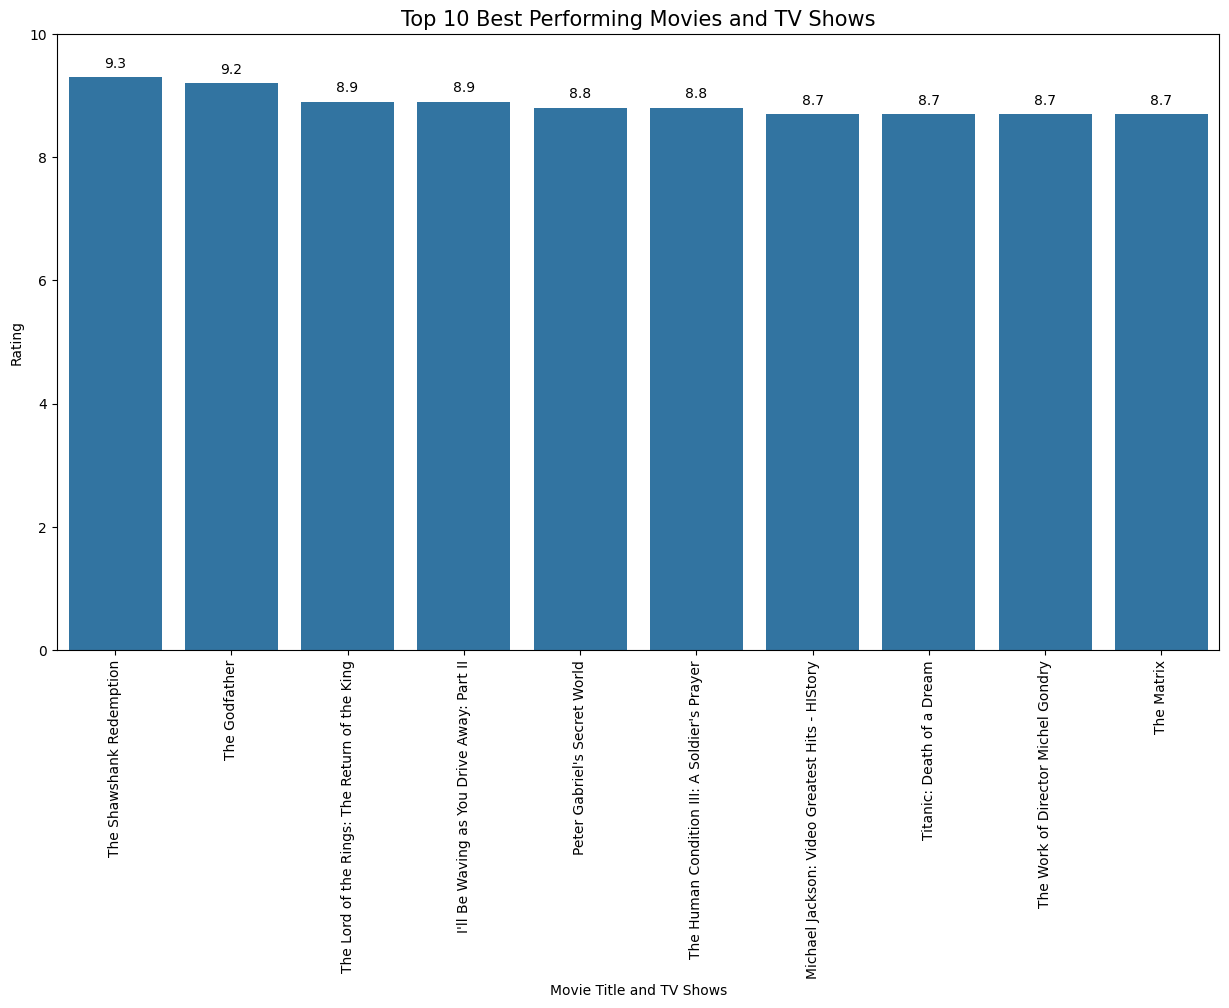

In [33]:
fig = plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'title', y = 'rating', data = df_new.sort_values('rating', ascending=False)[0:10])

# Plot the ratings on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Movie Title and TV Shows')
plt.ylabel('Rating')
plt.title('Top 10 Best Performing Movies and TV Shows', fontsize = 15)

# Set y-axis ticks
plt.yticks([0, 2, 4, 6, 8, 10])

plt.show()

## Distribution of Category

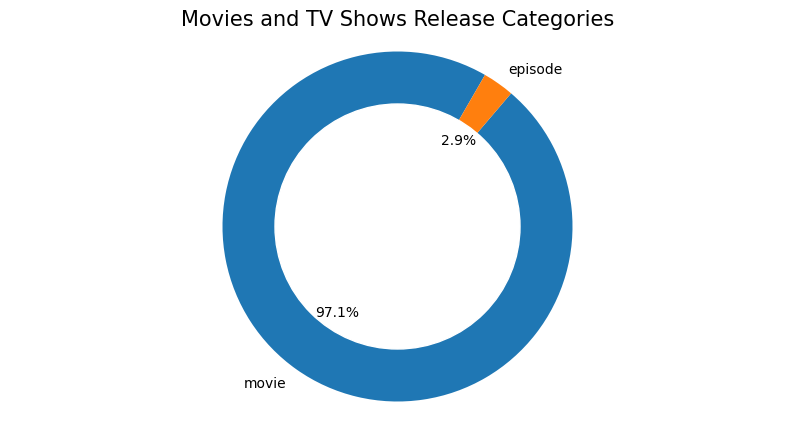

In [34]:
# Compute counts for each category
category_counts = df_new['category'].value_counts()

# Plotting
plt.figure(figsize=(10, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=60, wedgeprops=dict(width=0.4))
plt.title("Movies and TV Shows Release Categories", fontsize=15)
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))  # Add a white circle to create a donut chart effect
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Genre with the most releases

In [35]:
genres_series = df_new['genre'].str.split(',\s*').explode()

# Count the occurrences of each genre
genre_counts = genres_series.value_counts().reset_index()

# Rename columns
genre_counts.columns = ['genre', 'count']
genre_counts.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\331481654.py:1: SyntaxWarning: invalid escape sequence '\s'
  genres_series = df_new['genre'].str.split(',\s*').explode()


,genre,count
0,Drama,2803
1,Comedy,1626
2,Romance,1205
3,Thriller,1157
4,Action,1061


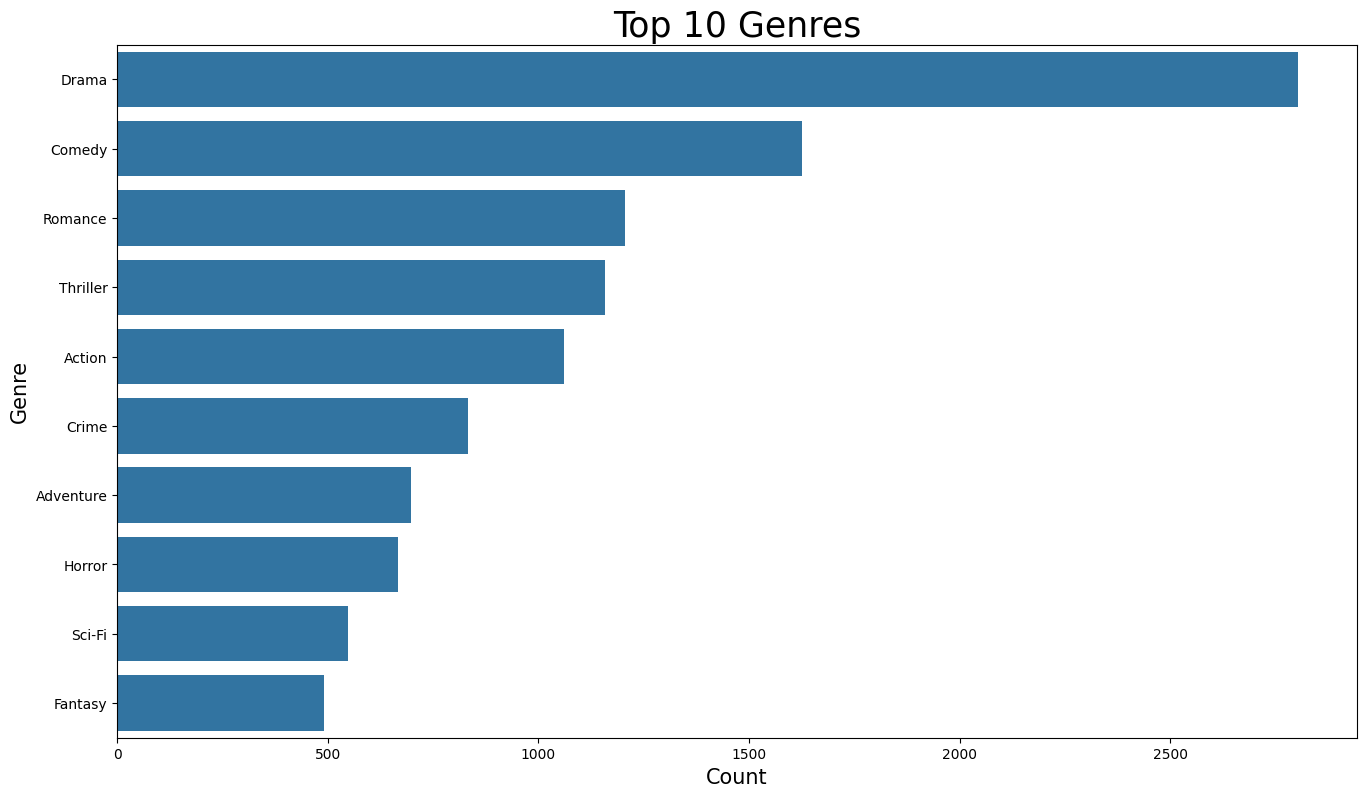

In [36]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = 'count', y = 'genre', data = genre_counts.sort_values('count', ascending=False)[0:10])
plt.title("Top 10 Genres", fontsize = 25)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Genre', fontsize = 15)
plt.show()

## Total number of releases each year

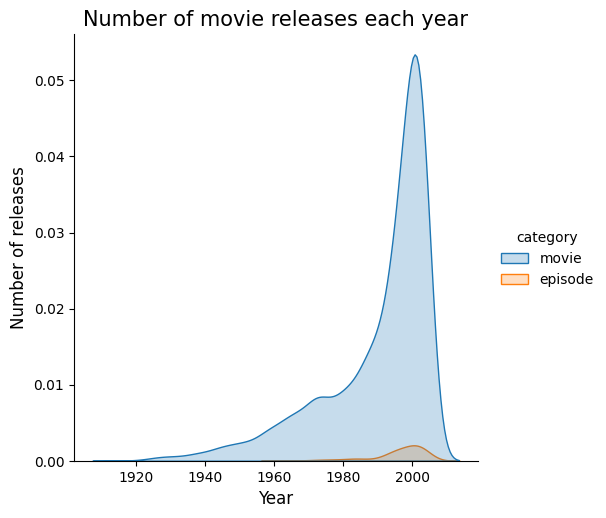

In [37]:
sns.displot(df_new, x="year", hue="category", kind="kde", fill=True)
plt.title("Number of movie releases each year", fontsize = 15)
plt.ylabel('Number of releases', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.show()

## Top 10 countries with most releases

In [38]:
country_series = df_new['country'].str.split(',\s*').explode()

# Count the occurrences of each genre
country_counts = country_series.value_counts().reset_index()

# Rename columns
country_counts.columns = ['country', 'count']
country_counts.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\1933563611.py:1: SyntaxWarning: invalid escape sequence '\s'
  country_series = df_new['country'].str.split(',\s*').explode()


,country,count
0,United States,2793
1,United Kingdom,834
2,France,489
3,Canada,404
4,Japan,381


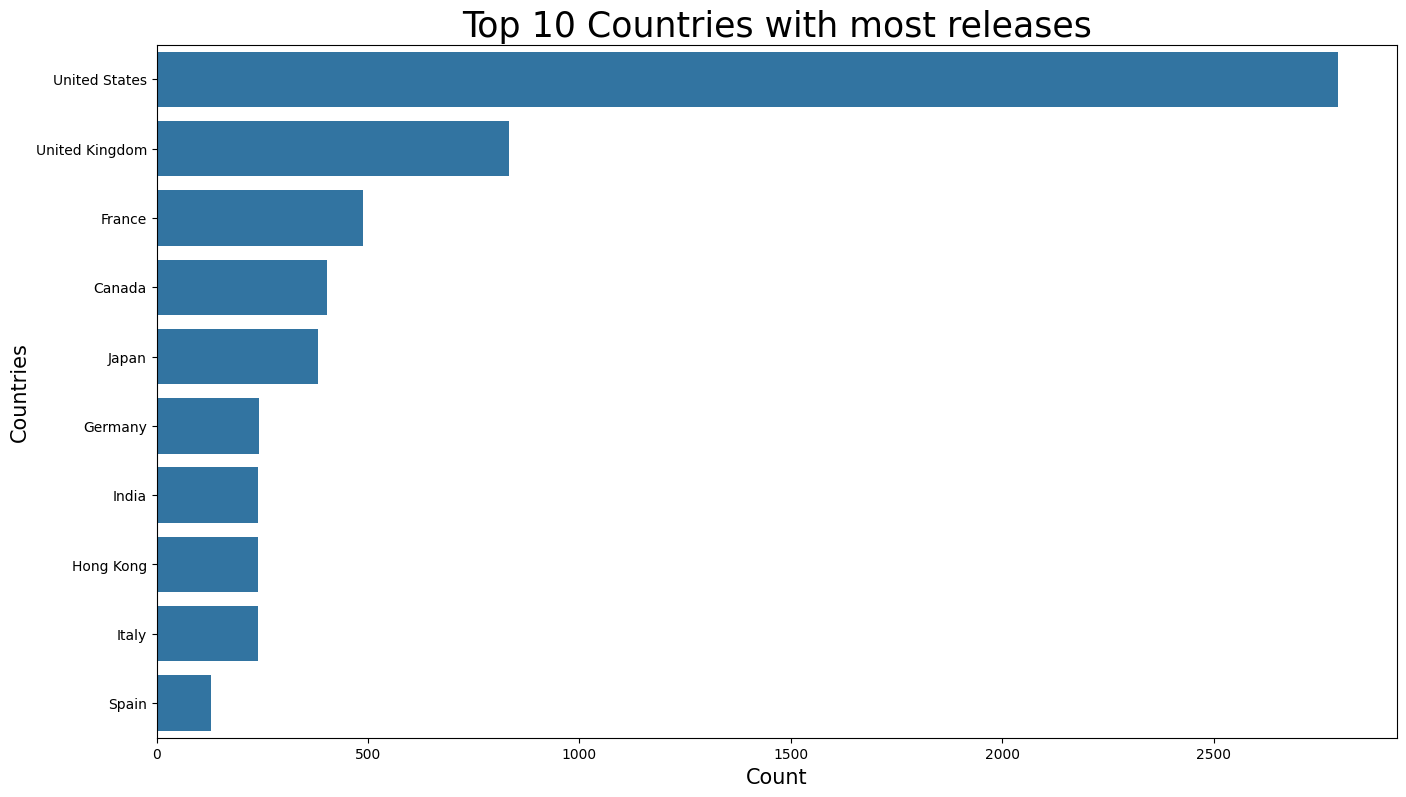

In [39]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = 'count', y = 'country', data = country_counts.sort_values('count', ascending=False)[0:10])
plt.title("Top 10 Countries with most releases", fontsize = 25)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Countries', fontsize = 15)
plt.show()

## Top 10 Languages

In [40]:
language_series = df_new['language'].str.split(',\s*').explode()

# Count the occurrences of each genre
language_counts = language_series.value_counts().reset_index()

# Rename columns
language_counts.columns = ['language', 'count']
language_counts.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\1660907727.py:1: SyntaxWarning: invalid escape sequence '\s'
  language_series = df_new['language'].str.split(',\s*').explode()


,language,count
0,English,4015
1,French,515
2,Japanese,387
3,Spanish,321
4,German,262


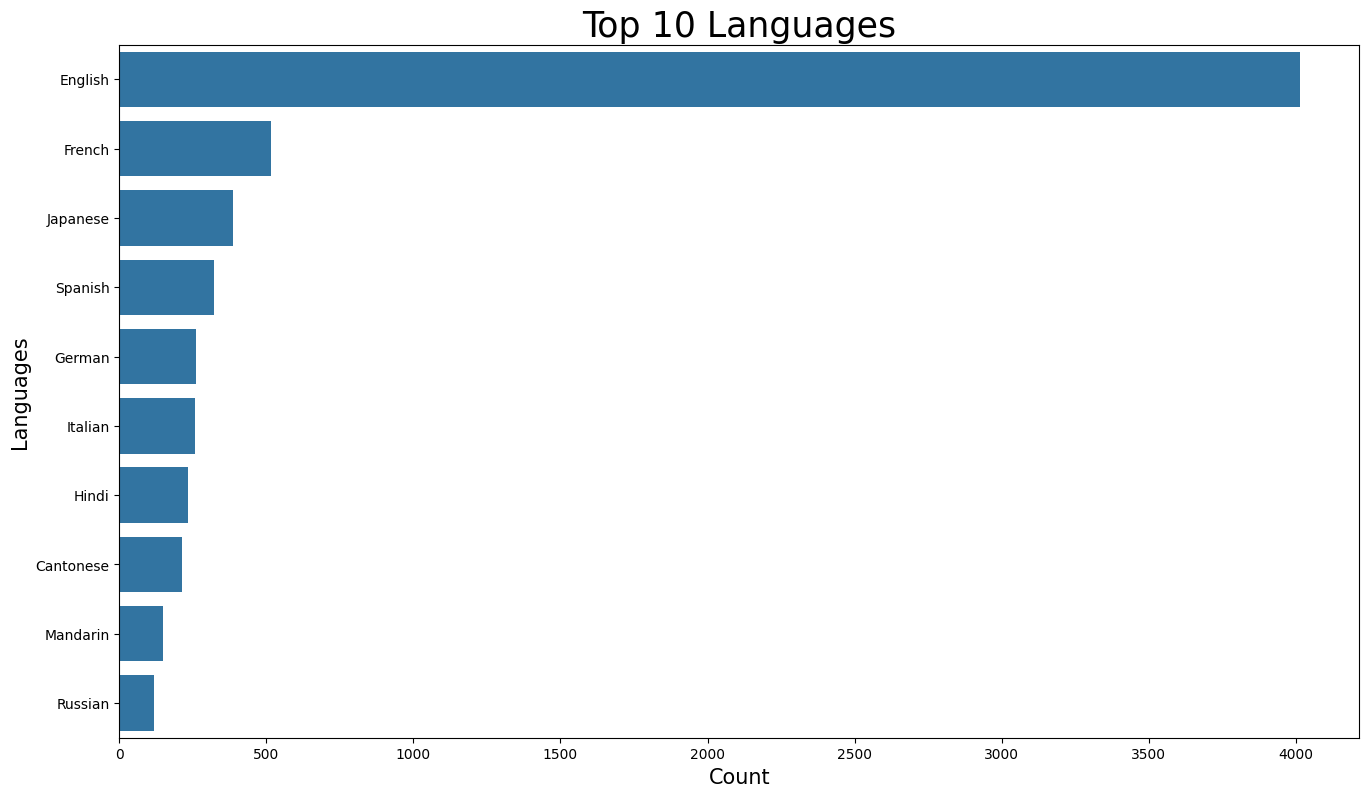

In [41]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = 'count', y = 'language', data = language_counts.sort_values('count', ascending=False)[0:10])
plt.title("Top 10 Languages", fontsize = 25)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Languages', fontsize = 15)
plt.show()

## Top 10 Directors

In [42]:
director_series = df_new['director'].str.split(',\s*').explode()

# Count the occurrences of each genre
director_counts = director_series.value_counts().reset_index()

# Rename columns
director_counts.columns = ['director', 'count']
director_counts.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\2157142991.py:1: SyntaxWarning: invalid escape sequence '\s'
  director_series = df_new['director'].str.split(',\s*').explode()


,director,count
0,Akira Kurosawa,18
1,Federico Fellini,15
2,Jim Wynorski,14
3,Johnnie To,14
4,Jing Wong,13


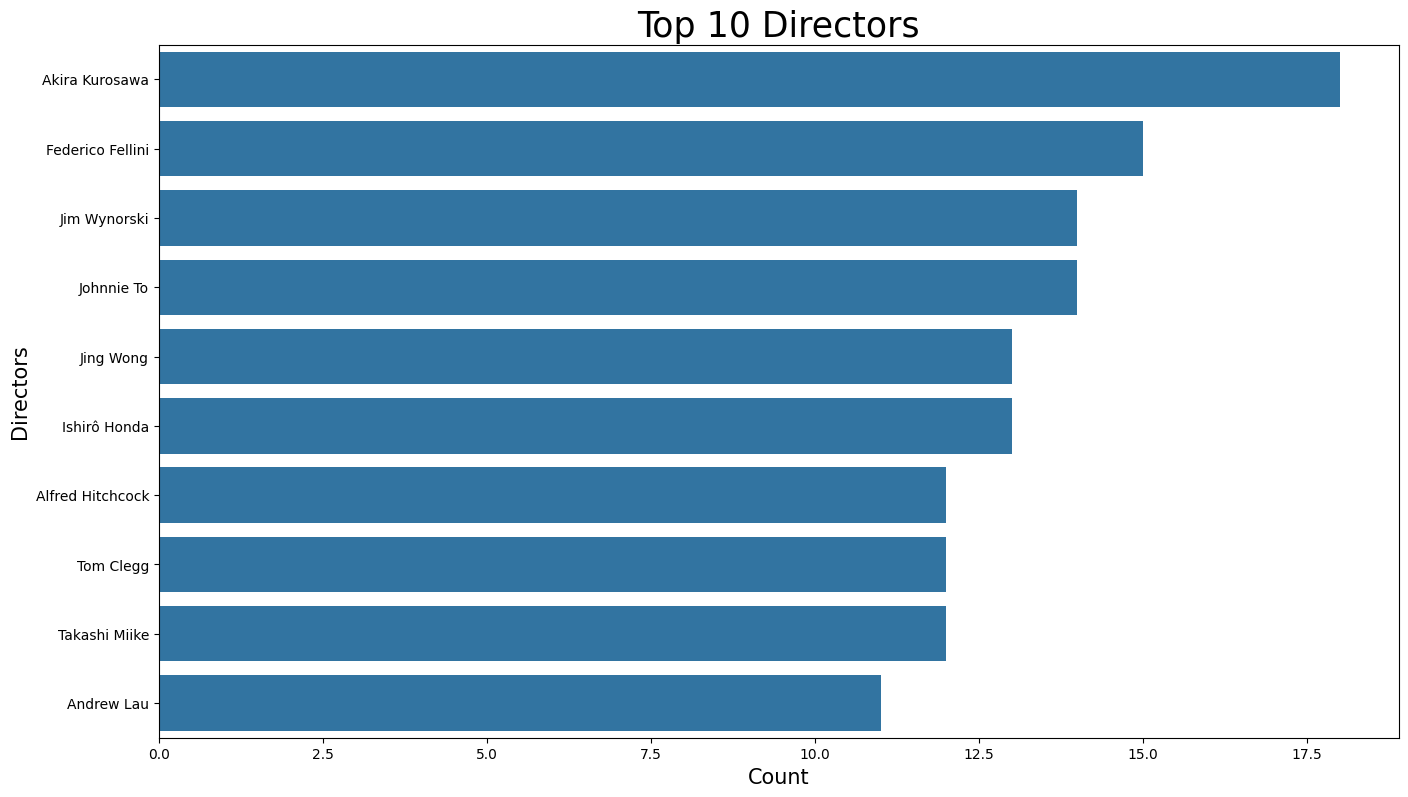

In [43]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x = 'count', y = 'director', data = director_counts.sort_values('count', ascending=False)[0:10])
plt.title("Top 10 Directors", fontsize = 25)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Directors', fontsize = 15)
plt.show()

## Wordcloud for Cast

C:\Users\KAREN J FERNANDES\AppData\Local\Temp\ipykernel_16584\2159400625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cast_no_stopwords'] = df_new['cast'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])


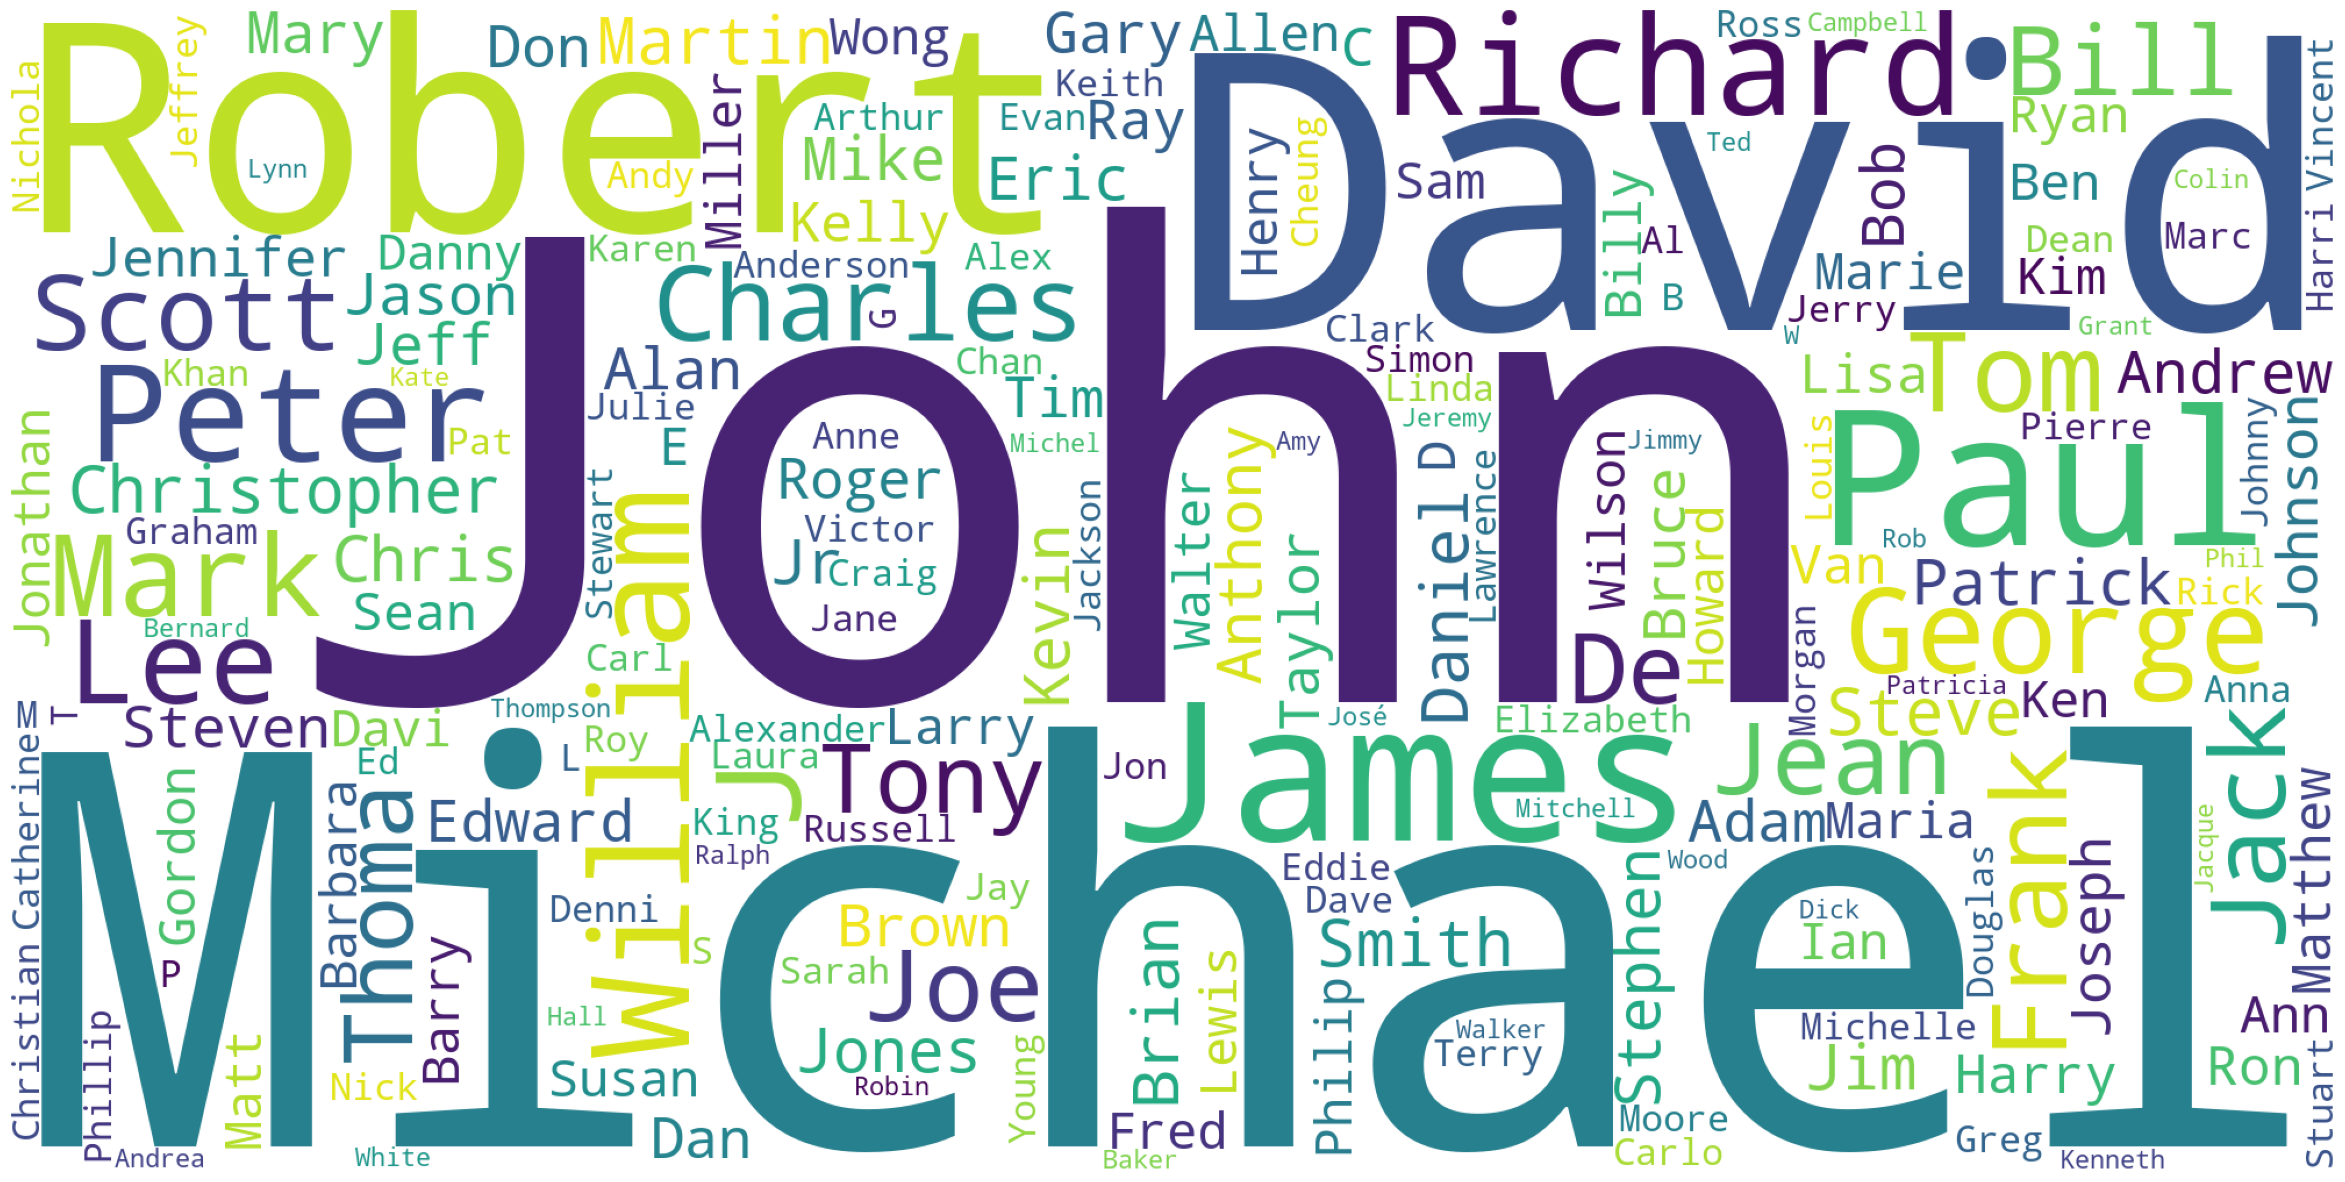

In [44]:
stop_words = set(stopwords.words('english'))
df_new['cast_no_stopwords'] = df_new['cast'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in df_new['cast_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

## Time series of Ratings

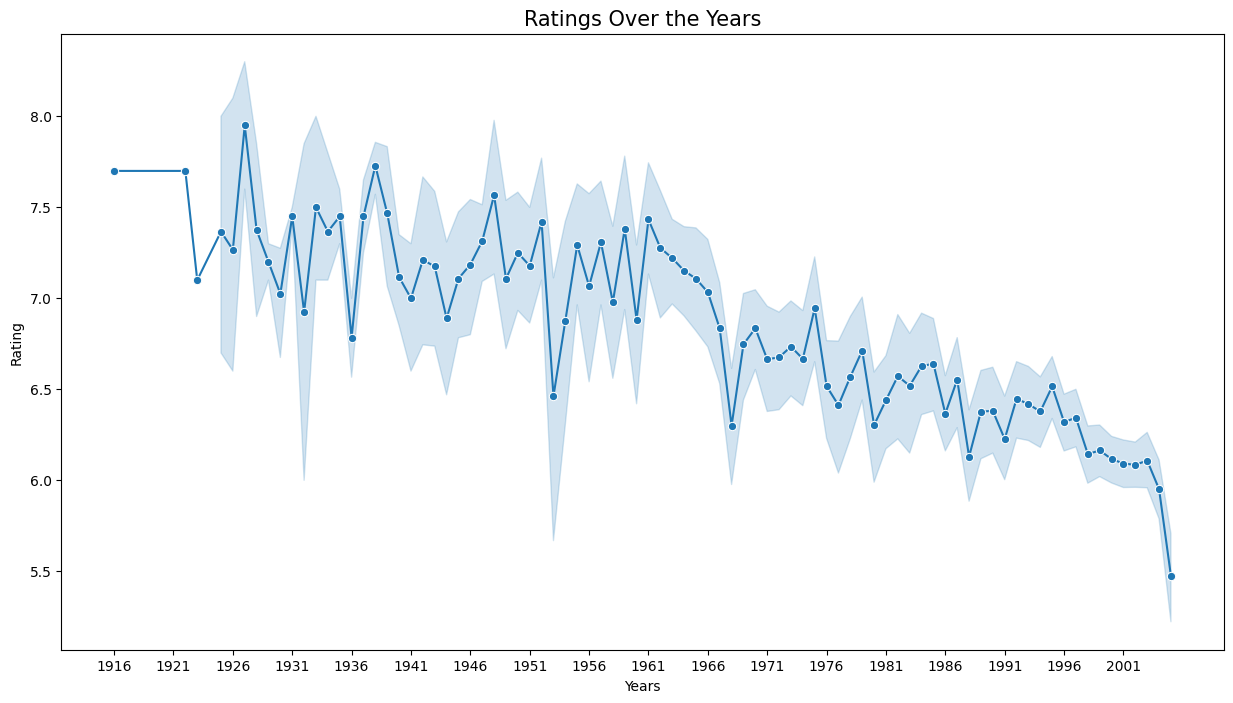

In [45]:
# Create a line chart using Seaborn
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='year', y='rating', data=df_new, marker='o')

# Set x-axis ticks for every 5 years
plt.xticks(range(df_new['year'].min(), df_new['year'].max() + 1, 5))

plt.xlabel('Years')
plt.ylabel('Rating')
plt.title('Ratings Over the Years', fontsize=15)
plt.show()

## Relationship between ratings and votes 

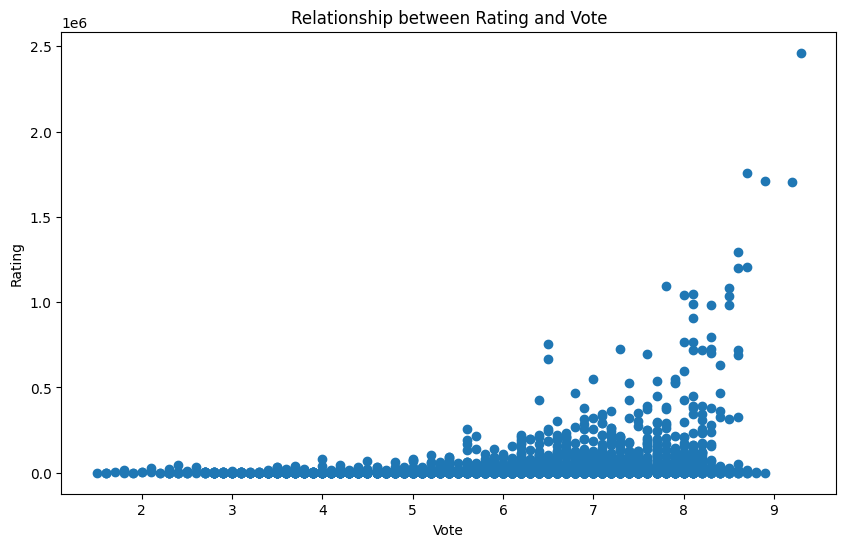

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(x = 'rating', y = 'vote', data = df_new)
plt.xlabel('Vote')
plt.ylabel('Rating')
plt.title('Relationship between Rating and Vote')
plt.show()